In [ ]:
# colab
# linux 환경

In [ ]:
# CLI 환경에서 mglearn을 설치하는 명령어
!pip install mglearn

     |████████████████████████████████| 540 kB 2.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=f2db11af64dc1c69380c7fc5ecb22cca7d87a6b5270ae0b87cb2e9008f2d97a6
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import matplotlib.pyplot as plt
import mglearn

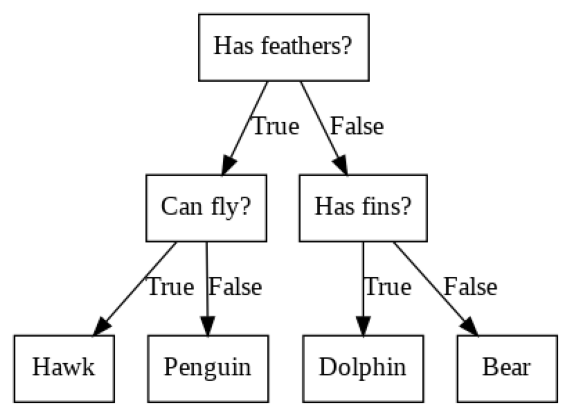

In [ ]:
plt.figure(figsize=(10,10))
mglearn.plots.plot_animal_tree()

#### knn - 회귀, 분류
#### 선형 회귀 - 회귀
* 라소(Lasso)회귀, 리지(Ridge)회귀

#### 의사결정트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y, stratify=cancer.target, test_size=0.3, random_state=77)

model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print("학습용 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트용 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도 : 0.972
테스트용 세트 정확도 : 0.912


In [ ]:
# max_depth = 0
# depth를 제한하는 것이 일반적으로 학습용 정확도는 떨어져도, 테스트 정확도는 올라가는 편이다.
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
print("학습용 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
print("테스트용 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

학습용 세트 정확도 : 1.000
테스트용 세트 정확도 : 0.918


In [ ]:
# max_depth = 2
model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot',
                class_names=['악성', '양성'],
                feature_names = cancer.feature_names,
                impurity = False, filled=True) # color

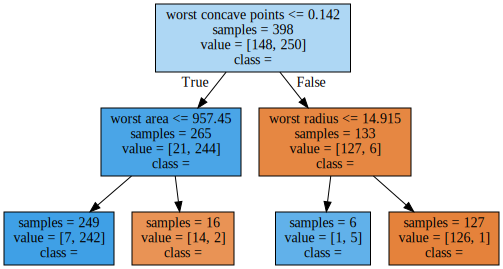

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 분류 기준 특성은 여러번 반복적으로 쓰일 수 있다.

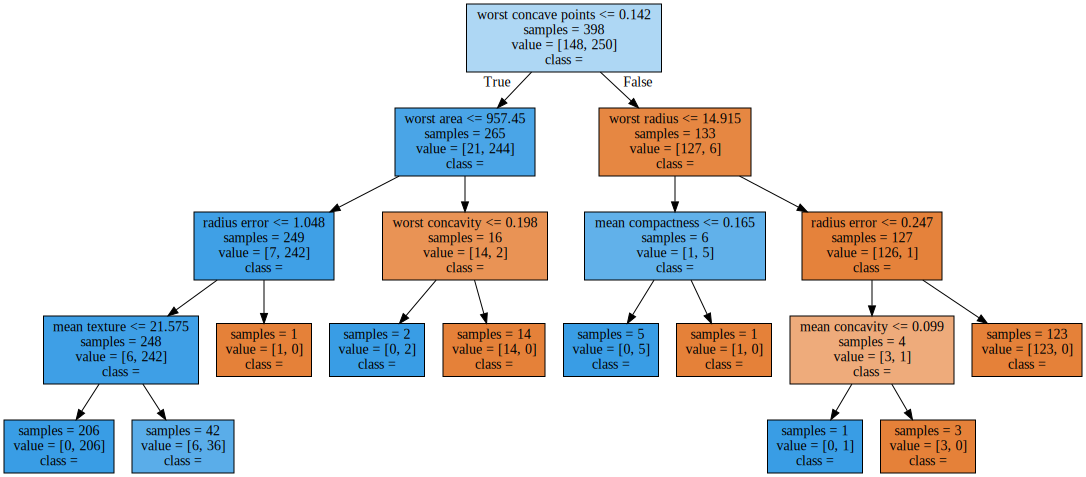

In [ ]:
# max_depth = 4
model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot',
                class_names=['악성', '양성'],
                feature_names = cancer.feature_names,
                impurity = False, filled=True) # color

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 트리의 특성 중요도

In [ ]:
import numpy as np

In [ ]:
def plot_feature_imp_cancer(model):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh( range(n_features), imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

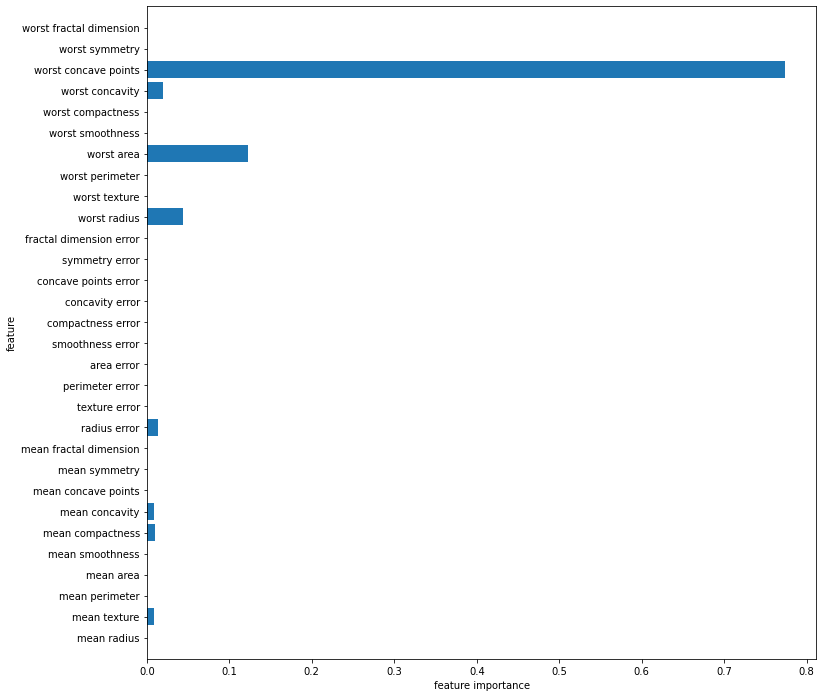

In [ ]:
plt.figure(figsize=(12,12))
plot_feature_imp_cancer(model)

### 사전 가지치기

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [ ]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

In [ ]:
def testTreeModel(TestSize=0.3):
    cancer = load_breast_cancer()
    all_X = cancer.data
    all_Y = cancer.target
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                        all_Y, 
                                        stratify=cancer.target, 
                                        test_size = TestSize,
                                        random_state=77)
    
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
testTreeModel(0.3)  # 테스트 사이즈 30%
testTreeModel(0.1)  # 테스트 사이즈 10%
testTreeModel(0.2)  # 테스트 사이즈 20%

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912


### max_depth 변경해서 확인하기

In [ ]:
def testTreeModel(TestSize=0.3, treedepth=3):
    cancer = load_breast_cancer()
    X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                            all_Y, 
                                            stratify=cancer.target, 
                                            test_size = TestSize,
                                            random_state=77)
    tree = DecisionTreeClassifier(max_depth=treedepth, random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

#### 3-3 (추가) testsize별, depth별 확인해 보기, 가장 좋은 점수를 올려보기(댓글)

In [ ]:
for testsize in range(1,6):
    for treedepth in range(1,8):
        print(f'testsize={testsize/10}, treedepth={treedepth}')
        testTreeModel(testsize/10, treedepth)
        print()

testsize=0.1, treedepth=1
훈련 세트 정확도 : 0.926
테스트 세트 정확도 : 0.860

testsize=0.1, treedepth=2
훈련 세트 정확도 : 0.953
테스트 세트 정확도 : 0.877

testsize=0.1, treedepth=3
훈련 세트 정확도 : 0.971
테스트 세트 정확도 : 0.877

testsize=0.1, treedepth=4
훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.877

testsize=0.1, treedepth=5
훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.877

testsize=0.1, treedepth=6
훈련 세트 정확도 : 0.996
테스트 세트 정확도 : 0.895

testsize=0.1, treedepth=7
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912

testsize=0.2, treedepth=1
훈련 세트 정확도 : 0.930
테스트 세트 정확도 : 0.895

testsize=0.2, treedepth=2
훈련 세트 정확도 : 0.956
테스트 세트 정확도 : 0.886

testsize=0.2, treedepth=3
훈련 세트 정확도 : 0.980
테스트 세트 정확도 : 0.895

testsize=0.2, treedepth=4
훈련 세트 정확도 : 0.987
테스트 세트 정확도 : 0.886

testsize=0.2, treedepth=5
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.912

testsize=0.2, treedepth=6
훈련 세트 정확도 : 0.996
테스트 세트 정확도 : 0.895

testsize=0.2, treedepth=7
훈련 세트 정확도 : 0.998
테스트 세트 정확도 : 0.868

testsize=0.3, treedepth=1
훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.883

testsize=0.3, treedepth=2
훈련 세트 정확도 : 0.

#### 3-4 모델을 만들고, 특성 중요도 뽑아보기(특성 중요도가 높은 3개- 댓글) 

In [ ]:
# 암 데이터 훈련시키기
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                        all_Y, 
                                        stratify=cancer.target, 
                                        test_size = 0.4,
                                        random_state=77)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.994
테스트 세트 정확도 : 0.939


In [ ]:
# 중요도 그래프 그리기 준비
def plot_feature_imp_cancer(model):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh( range(n_features), imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel('feature importance')
    plt.ylabel('feature')
    plt.ylim(-1, n_features)

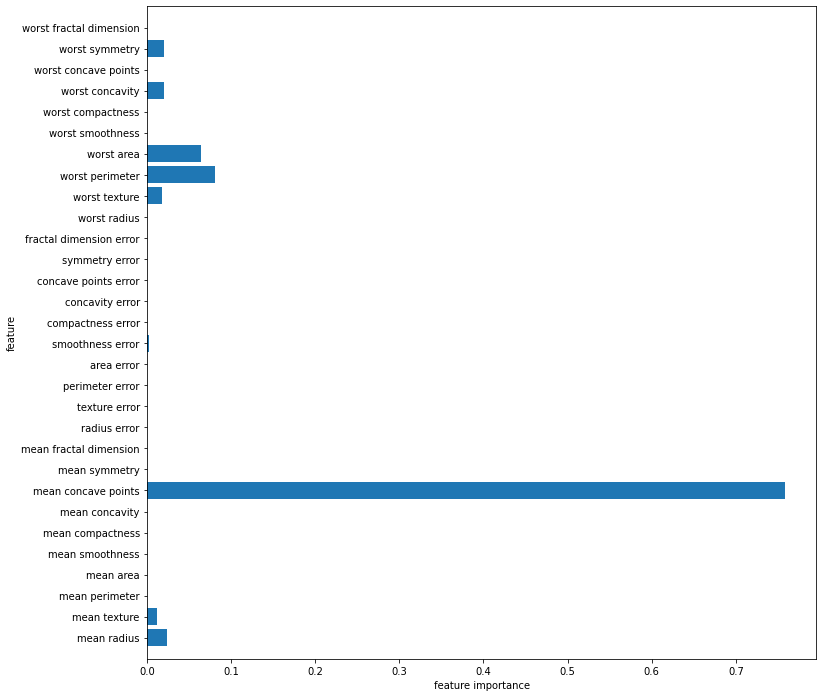

In [ ]:
# 그래프 출력
plt.figure(figsize=(12,12))
plot_feature_imp_cancer(tree)